In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import joblib
import os
import warnings

warnings.filterwarnings('ignore')


In [ ]:
# Membaca data dari file CSV
file_path = "/content/drive/MyDrive/kuliah/urban analitik/tugas besar kelompok/weather-1.csv"
data = pd.read_csv(file_path)

# Melihat beberapa baris dari data
print(data.head())


       DATE     CH    HH   KA    KU    PM     TU  TEMP  BANJIR
0  1/4/2024  195.6  23.0  4.0  85.0  36.0  921.8  23.8     0.0
1  2/4/2024  191.2  26.0  4.0  81.0  48.0  922.0  23.1     0.0
2  3/4/2024  240.8  22.0  7.0  71.0  81.0  921.6  23.8     0.0
3  4/4/2024  304.8  21.0  5.0  75.0  66.0  922.1  23.9     0.0
4  5/4/2024  286.5  21.0  2.0  68.0  90.0  921.9  24.6     0.0


In [ ]:
data.size, data.shape

(2160, (240, 9))

In [ ]:
# Memisahkan fitur dan target
features = ['CH', 'HH', 'KA', 'KU', 'PM', 'TU', 'TEMP']
X = data[features]
y = data['BANJIR']


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melihat ukuran dari masing-masing set
print("Ukuran data training:", X_train.shape, y_train.shape)
print("Ukuran data testing:", X_test.shape, y_test.shape)


Ukuran data training: (192, 7) (192,)
Ukuran data testing: (48, 7) (48,)


RandomForest Mean RMSE: 1.952234230584716, Std: 0.5454186547353346
GradientBoosting Mean RMSE: 1.9969501473038762, Std: 0.4922673070622338
AdaBoost Mean RMSE: 2.119201209542177, Std: 0.4573733347231074
DecisionTree Mean RMSE: 2.481665414752083, Std: 0.6859325301296328
XGBoost Mean RMSE: 2.0900474515138034, Std: 0.45983588385477764
SVR Mean RMSE: 2.3044906158769782, Std: 0.9004778732227394
KNeighbors Mean RMSE: 2.033143167254063, Std: 0.6544683807855957
Linear Mean RMSE: 1.9970590563450739, Std: 0.5753565185044215
CatBoost Mean RMSE: 1.8117673899951754, Std: 0.5149117757618105


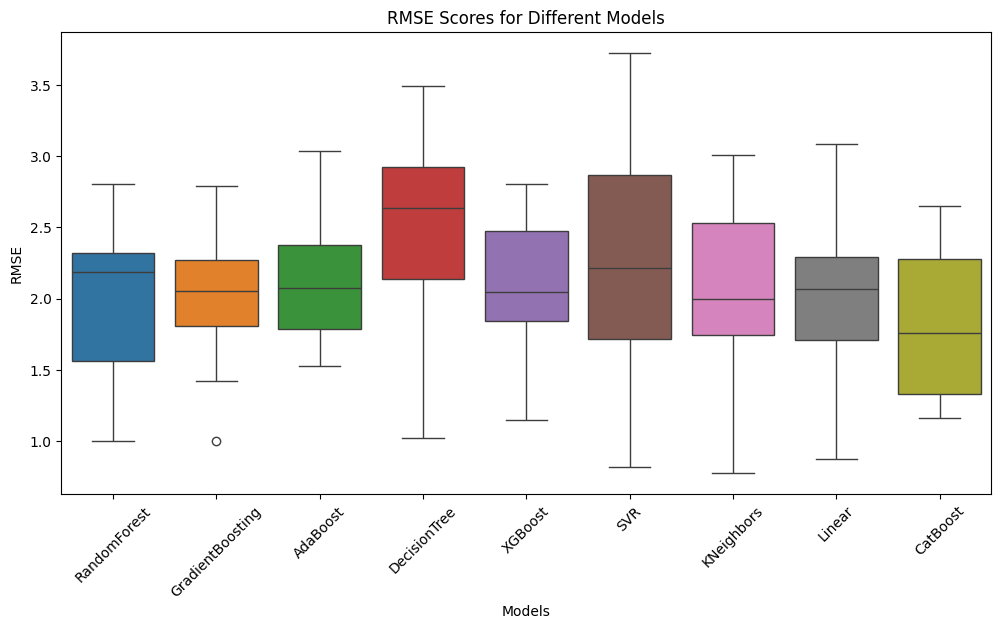

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi model yang akan dibandingkan
models = [RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(),
          XGBRegressor(objective='reg:squarederror'), SVR(), KNeighborsRegressor(), LinearRegression(), CatBoostRegressor(logging_level='Silent')]

# Membuat list untuk menyimpan skor RMSE setiap model
model_names = ['RandomForest', 'GradientBoosting', 'AdaBoost', 'DecisionTree', 'XGBoost', 'SVR', 'KNeighbors', 'Linear', 'CatBoost']
rmse_scores = {name: [] for name in model_names}

# Membuat KFold untuk cross-validation
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Melakukan cross-validation dan menghitung RMSE
for model, name in zip(models, model_names):
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_results = np.sqrt(-cv_results)
    rmse_scores[name] = rmse_results
    print(f'{name} Mean RMSE: {rmse_results.mean()}, Std: {rmse_results.std()}')

# Visualisasi hasil validasi silang
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(rmse_scores))
plt.title('RMSE Scores for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/kuliah/urban analitik/tugas besar kelompok/HASIL/validasi_silang_tahap_5.png')
plt.show()


In [ ]:
# Menyimpan model dan hasil prediksi ke dalam folder HASIL
output_dir = "/content/drive/MyDrive/kuliah/urban analitik/tugas besar kelompok/HASIL"
os.makedirs(output_dir, exist_ok=True)

# Inisialisasi kembali model yang akan dilatih
models = [RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(),
          XGBRegressor(objective='reg:squarederror'), SVR(), KNeighborsRegressor(), LinearRegression(), CatBoostRegressor(logging_level='Silent')]

# Melakukan training dan menyimpan model serta prediksi
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)

    # Menyimpan model yang telah dilatih
    model_path = os.path.join(output_dir, f'{name}_model.pkl')
    joblib.dump(model, model_path)

    # Membuat prediksi pada data testing
    predictions = model.predict(X_test)

    # Menghitung RMSE pada data testing
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f'{name} RMSE on test set: {rmse}')

    # Membuat dataframe untuk submission
    submission_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    submission_path = os.path.join(output_dir, f'{name}_submission.csv')
    submission_df.to_csv(submission_path, index=False)


RandomForest RMSE on test set: 1.3088218302478505
GradientBoosting RMSE on test set: 1.2797280371785344
AdaBoost RMSE on test set: 1.8094911841389894
DecisionTree RMSE on test set: 1.5942605391424158
XGBoost RMSE on test set: 1.304234869223674
SVR RMSE on test set: 1.598382129797965
KNeighbors RMSE on test set: 1.5866631652622432
Linear RMSE on test set: 1.537454254599469
CatBoost RMSE on test set: 1.1411997572292796


RandomForest RMSE on full training set: 0.7720405861524812
GradientBoosting RMSE on full training set: 0.7638771752149736
AdaBoost RMSE on full training set: 1.6523046954541114
DecisionTree RMSE on full training set: 0.0
XGBoost RMSE on full training set: 0.0022008462799295915
SVR RMSE on full training set: 2.446816205180102
KNeighbors RMSE on full training set: 1.713670524536927
Linear RMSE on full training set: 1.9910273745760214
CatBoost RMSE on full training set: 0.21914546077617492


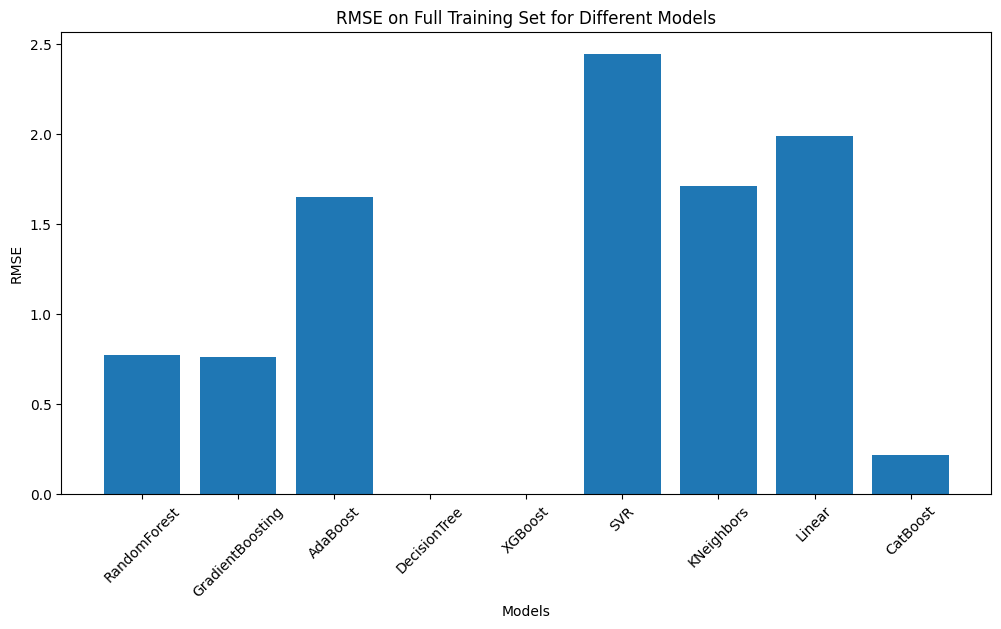

In [ ]:
import matplotlib.pyplot as plt

# Menghitung RMSE untuk semua model pada data training penuh
final_rmse_scores = {}

for model, name in zip(models, model_names):
    model.fit(X, y)

    # Membuat prediksi pada data training penuh
    train_predictions = model.predict(X)

    # Menghitung RMSE pada data training penuh
    rmse = np.sqrt(mean_squared_error(y, train_predictions))
    final_rmse_scores[name] = rmse
    print(f'{name} RMSE on full training set: {rmse}')

# Visualisasi RMSE untuk semua model
plt.figure(figsize=(12, 6))
plt.bar(final_rmse_scores.keys(), final_rmse_scores.values())
plt.title('RMSE on Full Training Set for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/kuliah/urban analitik/tugas besar kelompok/HASIL/validasi_silang_tahap_7.png')
plt.show()


RandomForest RMSE on training set: 0.8313649669870227
RandomForest RMSE on testing set: 1.2873389866956824
GradientBoosting RMSE on training set: 0.7854719955146416
GradientBoosting RMSE on testing set: 1.2283072743075365
AdaBoost RMSE on training set: 1.6766895981338803
AdaBoost RMSE on testing set: 1.6947809023747318
DecisionTree RMSE on training set: 0.0
DecisionTree RMSE on testing set: 1.7440374613713625
XGBoost RMSE on training set: 0.0012467172482941706
XGBoost RMSE on testing set: 1.304234869223674
SVR RMSE on training set: 2.596653218806926
SVR RMSE on testing set: 1.598382129797965
KNeighbors RMSE on training set: 1.872108882161149
KNeighbors RMSE on testing set: 1.5866631652622432
Linear RMSE on training set: 2.098970231534161
Linear RMSE on testing set: 1.537454254599469
CatBoost RMSE on training set: 0.22105905468052536
CatBoost RMSE on testing set: 1.1411997572292796


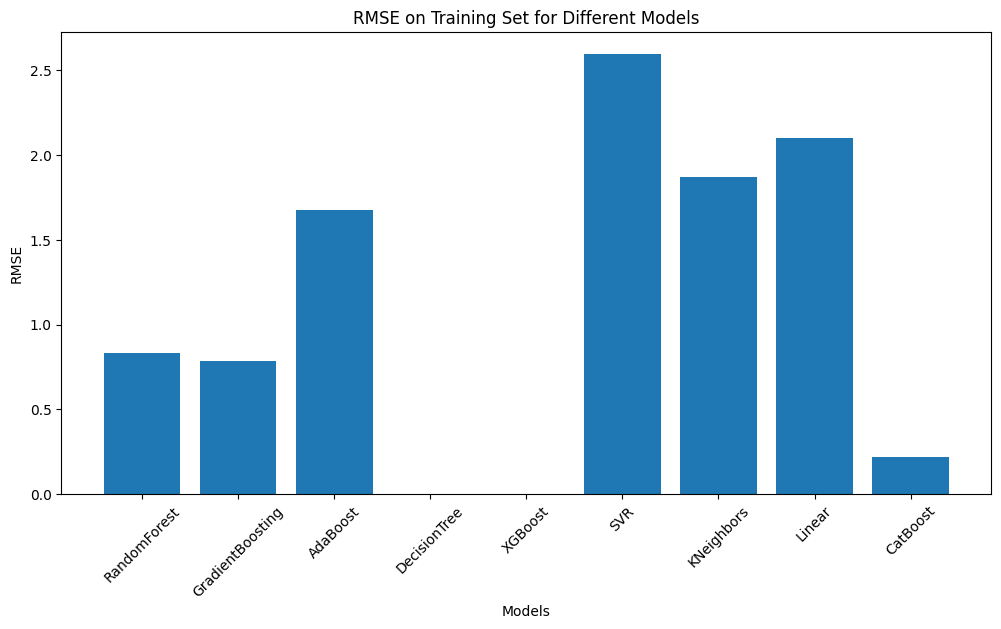

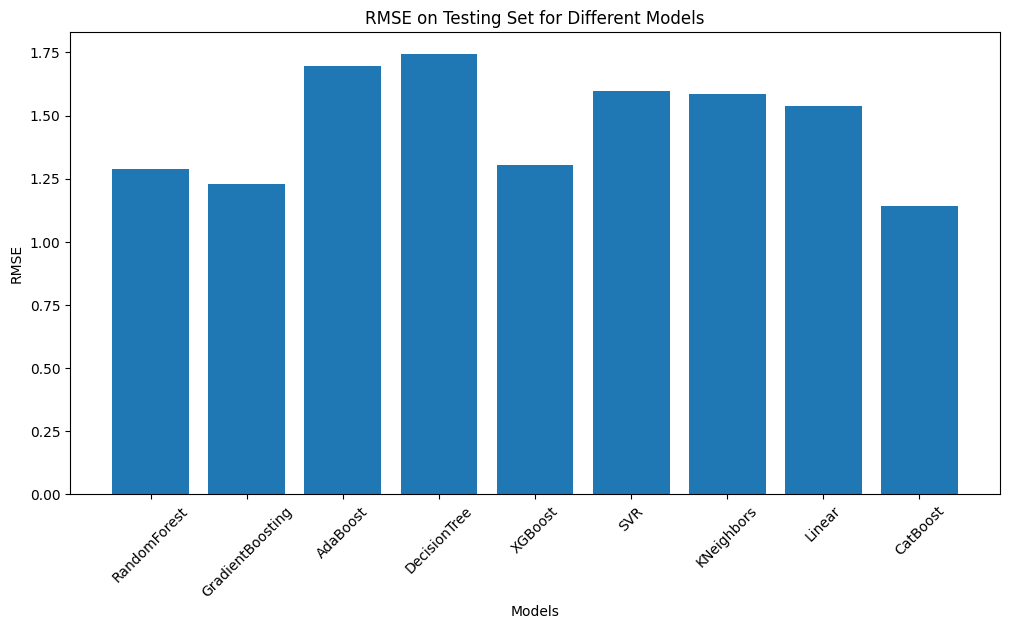

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menghitung RMSE untuk semua model pada data training dan testing
final_rmse_scores_train = {}
final_rmse_scores_test = {}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)

    # Membuat prediksi pada data training dan testing
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Menghitung RMSE pada data training dan testing
    rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
    rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))

    final_rmse_scores_train[name] = rmse_train
    final_rmse_scores_test[name] = rmse_test

    print(f'{name} RMSE on training set: {rmse_train}')
    print(f'{name} RMSE on testing set: {rmse_test}')

# Visualisasi RMSE untuk semua model pada data training
plt.figure(figsize=(12, 6))
plt.bar(final_rmse_scores_train.keys(), final_rmse_scores_train.values())
plt.title('RMSE on Training Set for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/kuliah/urban analitik/tugas besar kelompok/HASIL/rmse_training_set.png')
plt.show()

# Visualisasi RMSE untuk semua model pada data testing
plt.figure(figsize=(12, 6))
plt.bar(final_rmse_scores_test.keys(), final_rmse_scores_test.values())
plt.title('RMSE on Testing Set for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/kuliah/urban analitik/tugas besar kelompok/HASIL/rmse_testing_set.png')
plt.show()
